# Test Plots zum Verstaendnis


In [1]:

import scipy.signal as sig
import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec
import math


ORDER = 10


In [16]:


raw_measurements = ga.get_measurements('../../Datalogs/IMU_0.txt') # Format of Raw Measurements is that as in the datalogs

print(raw_measurements[1, 1:4])
    #dp.plot_measurements_out_of_data(raw_measurements)

# Low and Highfilter of the Accelerometer
lowpass_filter_acc = sig.butter(ORDER, 15.0, btype="lowpass", output="sos", fs=100.0)
highpass_filter_acc = sig.butter(ORDER, 40.0, btype="highpass", output="sos", fs=100.0)

time = raw_measurements[:, 0]
acc_x = raw_measurements[:,1]

filtered_acc_x = sig.sosfilt(highpass_filter_acc, acc_x) # ACC_X
print(filtered_acc_x[1:4])

# Plot Raw Measurement and Original Data
fig = plot.figure(tight_layout=True)
gs = gridspec.GridSpec(2,1)
ax = fig.add_subplot(gs[0,0])
ax.plot(time, acc_x)
ax = fig.add_subplot(gs[1,0])
ax.plot(time, filtered_acc_x)
plot.show()



NameError: name 'ga' is not defined

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90.
 91. 92. 93. 94. 95. 96. 97. 98. 99.]
28298
(28298,)
100


c:\Users\veigh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\veigh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


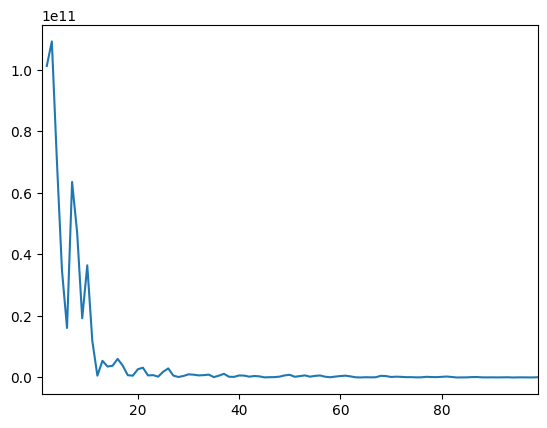

In [ ]:
import scipy.fft as fft
import numpy as np

dt = 0.01 # sample intervall

sample_rate = 1/dt

acc_x_fft = fft.fft(acc_x)
power_spectrum_density = acc_x_fft * np.conj(acc_x_fft) / sample_rate

frequencies = np.arange(1, sample_rate)
print(frequencies)

print(len(power_spectrum_density))
print(np.shape(power_spectrum_density))
psd = power_spectrum_density[:100]

print(len(psd))

k = np.arange(1,99,dtype='int')

fig, ax = plot.subplots()
plot.plot(frequencies[k], psd[k])
plot.xlim(frequencies[0], frequencies[-1])
plot.show()


In [ ]:
highpass_filter_acc = sig.butter(ORDER, 40.0, btype="highpass", output="sos", fs=100.0)

a_k = np.array([-418.46, -726.07 , 600.59])

print(np.linalg.norm(a_k))
hpf_a_k = np.array([0.01072958 ,-0.07817567 , 0.36998581])
print(np.linalg.norm(hpf_a_k))

low_a_k = sig.sosfilt(lowpass_filter_acc, hpf_a_k)
print(low_a_k)
print(np.linalg.norm(low_a_k))


1031.0163745547402
0.3783068316436824
[5.32332147e-07 3.56750853e-06 1.34426247e-05]
1.391814118652343e-05


In [ ]:
lowpass_filter_mag = sig.butter(ORDER, 15, btype="lowpass", output="sos", fs=100)
highpass_filter_mag = sig.butter(ORDER, 45, btype="highpass", output="sos", fs=100)

mag_measurements = raw_measurements[:, 7:10]
print(mag_measurements)

hpf_mag = sig.sosfilt(highpass_filter_mag, mag_measurements)
print(hpf_mag[0])
print(np.linalg.norm(hpf_mag[0]))

low_mag = sig.sosfilt(lowpass_filter_mag, hpf_mag)
print(low_mag[0])
print(np.linalg.norm(low_mag))


[[-16.95 -18.45  90.9 ]
 [-16.5  -17.85  92.1 ]
 [-16.2  -17.7   92.7 ]
 ...
 [ -8.85  -5.25  99.6 ]
 [ -8.85  -5.25  99.6 ]
 [ -8.25  -6.6   99.  ]]
[-6.13538316e-08  1.03711296e-06 -8.27909897e-06]
8.344030637549836e-06
[-3.04397906e-12  8.87668956e-12  2.68503057e-11]
4.937641619488169e-09


In [ ]:
lowpass_filter_gyro = sig.butter(ORDER,10, btype="lowpass", output="sos", fs=100)

gyro_meas = raw_measurements[:, 4:7]
print(gyro_meas)

low_gyro = sig.sosfilt(lowpass_filter_gyro, gyro_meas)
print(low_gyro[0])
print(np.linalg.norm(low_gyro[0]))


[[-1.03  1.24  0.5 ]
 [-0.05  1.18 -0.18]
 [ 1.56  0.26  2.43]
 ...
 [ 0.23 -1.41  1.89]
 [-0.69 -0.76  2.86]
 [-1.44  0.02  0.21]]
[-1.73408885e-06 -2.56362600e-05 -1.80904138e-04]
0.00018271981822567685


In [ ]:
arr = np.array([[1,2], [3, 4],[5,6],[7,8]])

list = [[1,2], [3,4], [5,6] ,[7,52]]

list_array = np.array([_ for _ in list if _ !=[5,6]])
print(list_array)


[[ 1  2]
 [ 3  4]
 [ 7 52]]


In [ ]:
from scipy.optimize import least_squares

placeholder = 0

def function(a, *args):
    c , _ = args
    return a+placeholder+c

def main(): 
  placeholder = 20
  c = 19
  result= least_squares(function, 5, args=(c, []))

  print(result["x"])

if __name__ == "__main__":
    main()


[-19.]


In [ ]:
import numpy as np
sample_rate = 100
time_begin = 1 # begin time in s
time_end = 225 # end time in s
sample_time = 1/sample_rate

num_elements = int((time_end - time_begin) / sample_time) + 1



times = [[time for time in np.linspace(start=time_begin,stop=time_end,num=num_elements)]]

print(times)


[[1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.1400000000000001, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.3599999999999999, 1.37, 1.38, 1.3900000000000001, 1.4, 1.4100000000000001, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.5899999999999999, 1.6, 1.6099999999999999, 1.62, 1.63, 1.6400000000000001, 1.65, 1.6600000000000001, 1.67, 1.6800000000000002, 1.69, 1.7000000000000002, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.8399999999999999, 1.85, 1.8599999999999999, 1.87, 1.88, 1.8900000000000001, 1.9, 1.9100000000000001, 1.92, 1.9300000000000002, 1.94, 1.9500000000000002, 1.96, 1.97, 1.98, 1.99, 2.0, 2.01, 2.02, 2.0300000000000002, 2.04, 2.05, 2.06, 2.0700000000000003, 2.08, 2.09, 2.1, 2.1100000000000003, 2.12, 2.13, 2.14, 2.1500000000000004, 2.16, 2.17, 2.1799999999999997, 2

In [ ]:
time = np.array([1, 2, 3,4])
meas = np.array([1,345,53254,4])

def get_shape(data):
    print(np.shape(data))
    print(data[0:4+1])

get_shape(meas.T)


(4,)
[    1   345 53254     4]


In [ ]:
norm = np.linalg.norm([1,1,1])
print(norm)

array = np.array([[1, 2], [3, 4], [5, 6 ], [7, 8]])
print(array[2: ,:])


1.7320508075688772
[[5 6]
 [7 8]]


In [ ]:


some_list = []


some_list.append(([1,3],2))

some_list.append(([3,3],5))


some_list.append(([7,6],7))

print(some_list)
min(cost for _, cost in some_list)


[([1, 3], 2), ([3, 3], 5), ([7, 6], 7)]


2

In [2]:
import numpy as np

matrix = np.eye(3)

matrix[0,0]=5

print(matrix)

vect = np.array([-38.39851485,  32.67326733, 105.7960396 ])
print(np.linalg.norm(vect))


[[5. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
117.19552182463323


In [14]:
a = [1,2,4]
b = [4,5,6]
c = np.array([[1,2], [4334,34],[22,34]])

print(c[1,1])


34


In [14]:
import numpy as np
import quaternion

q = np.quaternion(1,2,0,-1)
print(q)
print(q.conjugate())

a = np.array([1, 2, 3])
b = np.array([4,5])


print(np.append(a,b))



quaternion(1, 2, 0, -1)
quaternion(1, -2, -0, 1)
[1 2 3 4 5]


In [18]:
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.array([1,2])

c= np.array([[1,2],[3,4]])
d= np.array([[1,2],[3,4]])


f = np.concatenate((a,c, d),axis=1)
print(f)


[[1 2 1 2 1 2]
 [3 4 3 4 3 4]]


In [29]:
import json
from json import JSONEncoder
import numpy as np

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

A = np.array(   
 [[ 9.98175208e-01, -1.31904022e-02  ,4.89315879e-03  ],[1.38542229e-02 ,9.98597102e-01  ,1.23811444e-02 ],[-7.24020321e-03, -1.77614771e-02,9.93377592e-01]] )
b = np.array(
[-3.19279110e+00 ,-1.98014002e+01,  5.25052353e+00]
)

# Serialization ``
data = {"array": A}
encodedData = json.dumps(data, cls=NumpyArrayEncoder)
print(encodedData)

# Deserialization
print("Decode JSON serialized NumPy array")
decodedArrays = json.loads(encodedData)

finalNumpyArray = np.asarray(decodedArrays["array"])
print("NumPy Array")
print(finalNumpyArray)

str = json.loads("calibration_params.json")


{"array": [[0.998175208, -0.0131904022, 0.00489315879], [0.0138542229, 0.998597102, 0.0123811444], [-0.00724020321, -0.0177614771, 0.993377592]]}
Decode JSON serialized NumPy array
NumPy Array
[[ 0.99817521 -0.0131904   0.00489316]
 [ 0.01385422  0.9985971   0.01238114]
 [-0.0072402  -0.01776148  0.99337759]]


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [1]:
import json

# Pfad zur JSON-Datei
json_datei_pfad = 'calibration_params.json'

# JSON-Datei einlesen
with open(json_datei_pfad, 'r') as json_datei:
    daten = json.load(json_datei)

# Zugriff auf die Daten
for imu in daten['IMUs']:
    port = imu['port']
    accelerometer = imu['accelerometer']
    magnetometer = imu['magnetometer']
    gyroscope = imu['gyroscope']
     
    print(f"Port: {port}")
    print("Accelerometer:")
    print(f"  Theta: {accelerometer['theta']}")
    print(f"  Bias: {accelerometer['bias']}")
    print("Magnetometer:")
    print(f"  Theta: {magnetometer['theta']}")
    print(f"  Bias: {magnetometer['bias']}")
    print("Gyroscope:")
    print(f"  Theta: {gyroscope['theta']}")
    print(f"  Bias: {gyroscope['bias']}")
    print()


Port: 0
Accelerometer:
  Theta: [[0.997624911, 0.00501776681, 0.0211610225], [-0.00811466326, 0.986648117, 0.136514105], [-0.0214393877, -0.138505947, 0.985038735]]
  Bias: [-4.31342161, -22.0591438, 29.0506018]
Magnetometer:
  Theta: [[0.945738, -0.003007, -0.006546], [-0.003007, 0.922916, 0.007009], [-0.006546, 0.007009, 0.949019]]
  Bias: [-21.155646, 15.08731, 60.443188]
Gyroscope:
  Theta: [[0.92552028, -0.03281577, 0.33111104], [0.04988341, 0.88751086, 0.42732689], [0.13176533, -0.15967813, 0.80570043]]
  Bias: [0.01302428, 0.00608158, 0.00806136]

Port: 1
Accelerometer:
  Theta: [[0.998175208, -0.0131904022, 0.00489315879], [0.0138542229, 0.998597102, 0.0123811444], [-0.00724020321, -0.0177614771, 0.993377592]]
  Bias: [-3.1927911, -19.8014002, 5.25052353]
Magnetometer:
  Theta: [[1.264232, -0.044928, -0.002404], [-0.044928, 1.225985, -0.006535], [-0.002404, -0.006535, 1.244639]]
  Bias: [6.847327, -22.258473, 54.19993]
Gyroscope:
  Theta: [[0.91231546, 0.1936244, -0.01587249], 

In [1]:
import numpy as np
import quaternion

point = np.array([1 ,1, 1])

q_rot = np.quaternion(0,1,0,0) # Rotation about 180 degree about x-axis

point_new = quaternion.as_vector_part(q_rot*quaternion.from_vector_part(point)*q_rot.conjugate())
print(quaternion.as_float_array(q_rot))


[0. 1. 0. 0.]


In [3]:
m = np.array([-16.80280137,  16.49687529,  43.42112813])
quat = np.quaternion(0.474806461648927, 0.876212502987692, 0.0816703538793986, -0.0118501848797019)

m_rot = quaternion.as_vector_part(quat.conjugate()*quaternion.from_vector_part(m)*quat)
print(m_rot)


[-18.66776277  24.61247961 -38.5436879 ]


# Berechnung der mittleren Werte der des Experiment Data Sets zur Lage der IMUs (neu)

In [17]:
import pandas as pd
import numpy as np

raw_measurements_df = pd.read_csv("../../new_data_from_sd/Experiment/IMU_7.txt")
raw_measurements=raw_measurements_df.to_numpy() 

accel = raw_measurements[:,1:4]
accel = accel.mean(axis=0)*9.81/1000.0
print(accel)


[ 3.62919434  6.78300188 -5.91613409]


# Ermitteln aller Werte im alten Datensatz, welche nur die Gravitation messen 
- Ermitteln dieser Vektoren um Schranke in der Norm um 9.81

In [15]:
import pandas as pd
import numpy as np

raw_measurements_df = pd.read_csv("../../old_data_from_sd/IMU_7/IMU_7_data.txt", sep='\t')
raw_measurements=raw_measurements_df.to_numpy() 


# Extract Acceleration vectors
accel = raw_measurements[:,1:4]
accel = accel*9.81/1000.0



accel_gravity = [meas for meas in accel if 9.80<=np.linalg.norm(meas)<=9.82]
accel_gravity = accel.mean(axis=0)
print(accel_gravity)



[-4.00151833 -6.88741383  6.04520763]
